#  Интегралы

Правые прямоугольники:

In [1]:
def r_rectangle(f, a, b, points):
    dx =  (b - a) / points
    sum = 0.0
    xstart = a +  dx 
    for i in range(points):
        sum += f(xstart + i * dx)

    return sum * dx

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate 

Рассмотрим интеграл:
$$\int_{0}^{{\pi^2} \over 4} {1\over{\sin {\sqrt{x}}}} dx$$

Разобьем его на два интеграла, вычитая и прибавляя $${1\over {\sqrt{x}}}$$

f1 - исходный интеграл
f1_improved - разбиение на два интеграла
За настоящее значение взяла результат quad. Построила графики (в логарифмическом масштабе) разницы значения интеграла и "реального ответа" - "погрешности" - от количества разбиений. В итоге "погрешность" меньше у второго варианта 

initial -  3.6410464174938157
improved -  3.6639070733145376
scipy -  3.6638623767088663


<IPython.core.display.Javascript object>


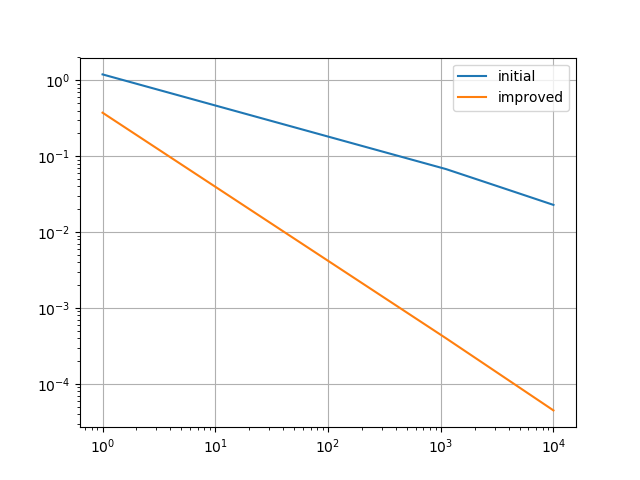

In [3]:
%matplotlib notebook

def f1(x):
    return 1 / np.sin (np.sqrt(x))
def integral1(a,b,n):
    return r_rectangle(f1, a, b, n)

def f1_improved(x):
    return 1 / np.sin (np.sqrt(x)) - 1 / np.sqrt(x)
def integral1_improved(a, b, n):
    return r_rectangle(f1_improved, a, b, n) + np.pi
    
real = integrate.quad(lambda x: 1 / np.sin(np.sqrt(x)), 0, (np.pi ** 2) / 4)[0]
print('initial - ', integral1(0, (np.pi ** 2) / 4, 10000))
print('improved - ', integral1_improved(0, (np.pi ** 2) / 4, 10000))
print('scipy - ', real)
x = np.linspace(1,10000,10)
y1 = [(np.abs(integral1(0, (np.pi ** 2) / 4, np.int(s)) - real)) for s in x]
y2 = [(np.abs(integral1_improved(0, (np.pi ** 2) / 4, np.int(s)) - real)) for s in x]
plt.xscale('log')
plt.yscale('log')
plt.plot(x, y1, label = 'initial')
plt.plot(x,y2, label = 'improved')
plt.legend(loc = 'best')
plt.grid()

Аналогично с интегралом: 
    $$\int_{0}^{1} {{1+x^2}\over\sqrt{1-x^2}} dx$$

<IPython.core.display.Javascript object>


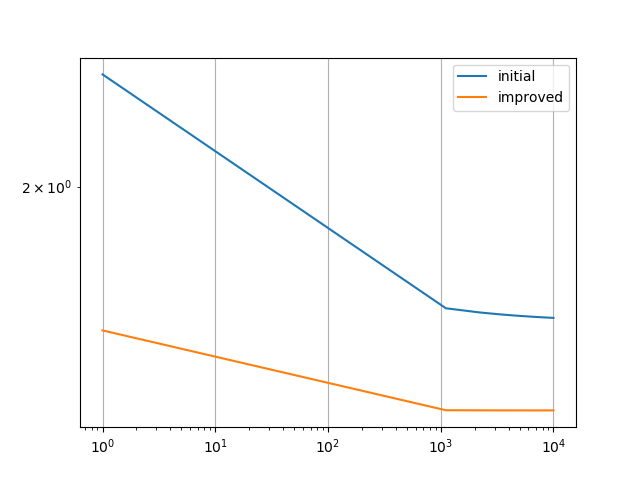

initial -  2.104981426398106
improved -  2.356144784186963
scipy -  2.3561944901923093


In [4]:
def f2(x):
    return (1 + x**2)/ np.sqrt(1 - x**2)
def integral2(a,b,n):
    return r_rectangle(f1, a, b, n)

def f2_improved(x):
    return (x**2 - 1) / np.sqrt(1 - x**2)
def integral2_improved(a, b, n):
    return r_rectangle(f2_improved, a, b, n) + np.pi

plt.figure()    
real2 = integrate.quad(lambda x: (1 + x**2)/np.sqrt(1 - x**2), 0, 1)[0]
print('initial - ', integral2(0, 1, 10000))
print('improved - ', integral2_improved(-1, 0, 10000))
print('scipy - ', real2)
x = np.linspace(1, 10000,10)

y1 = [(np.abs(integral2(0,1, np.int(s)) - real)) for s in x]
y2 = [(np.abs(real - integral2_improved(-1, 0, np.int(s)))) for s in x]
plt.xscale('log')
plt.yscale('log')
plt.plot(x, y1, label = 'initial')
plt.plot(x,y2, label = 'improved')
plt.legend(loc = 'best')
plt.grid()